# Matplotlib Tutorial Part 09 - Customization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np
stock = "EBAY"

## Getting and Cleaning Data

In [2]:
# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=10y/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []  
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})

## Rotate Labels

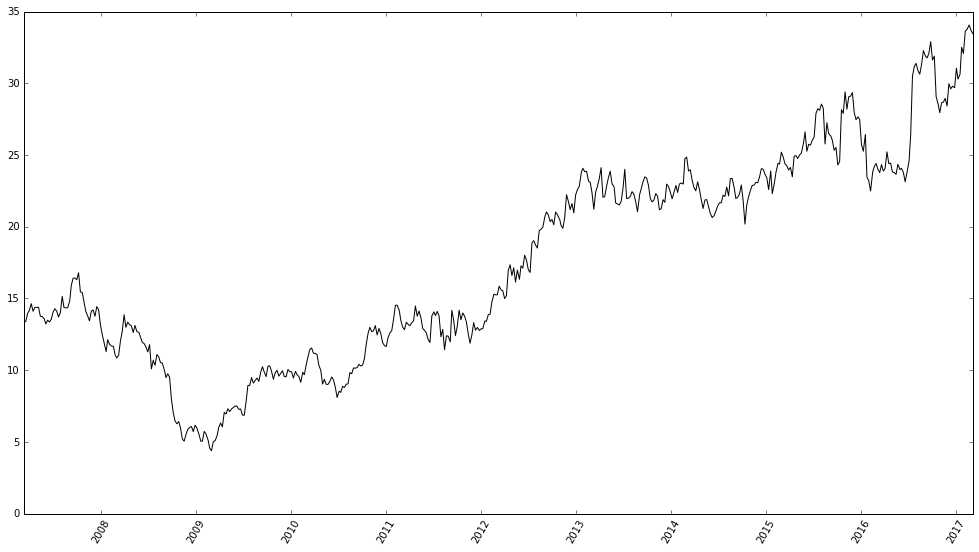

In [3]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Rotate the labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)

plt.show()

## Draw a grid

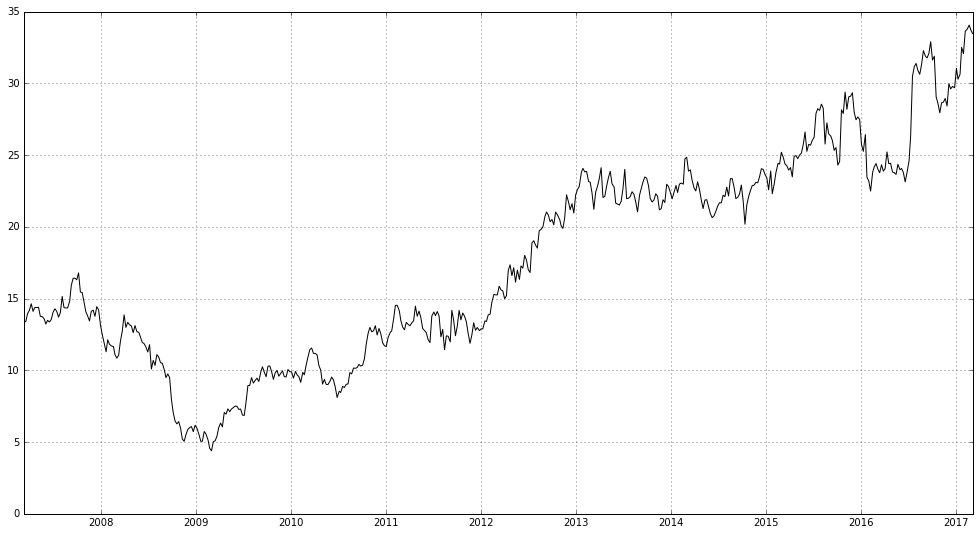

In [4]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Draw a Grid
ax1.grid(True)

plt.show()

## Change Axis Label Colour

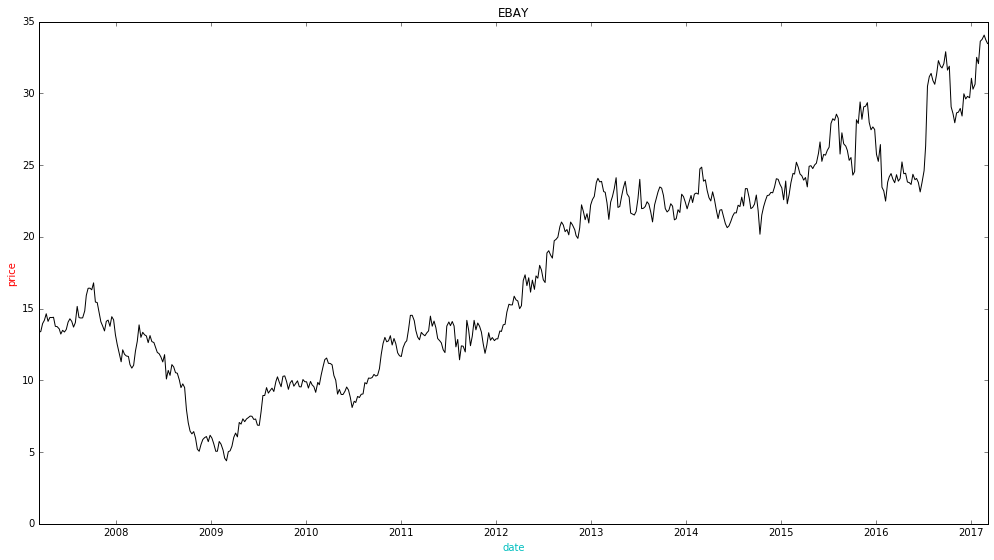

In [5]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Change axis colours
ax1.xaxis.label.set_color('c')
ax1.yaxis.label.set_color('r')

plt.xlabel('date')
plt.ylabel('price')
plt.title(stock)

plt.show()

## Change Axis Values Colour

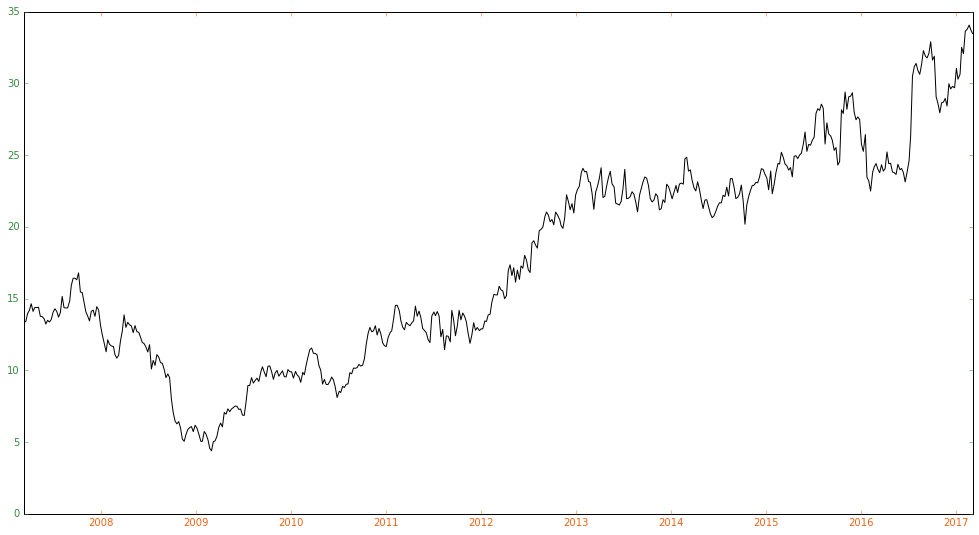

In [6]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Change axis label color
ax1.tick_params(axis='x',colors='#f06215')
ax1.tick_params(axis='y',colors='#36873f')

plt.show()

## Set Margins

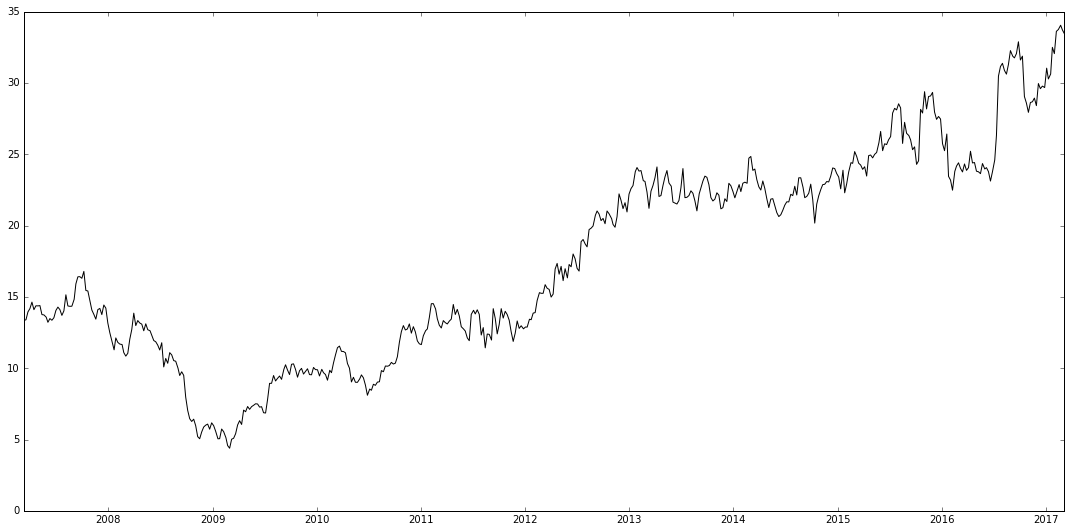

In [7]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Margins
plt.subplots_adjust(left=.09, 
                    bottom=.18,
                    right=.94,
                    top=.95,
                    wspace=.2,
                    hspace=0)

plt.show()

## Set specific values for Y

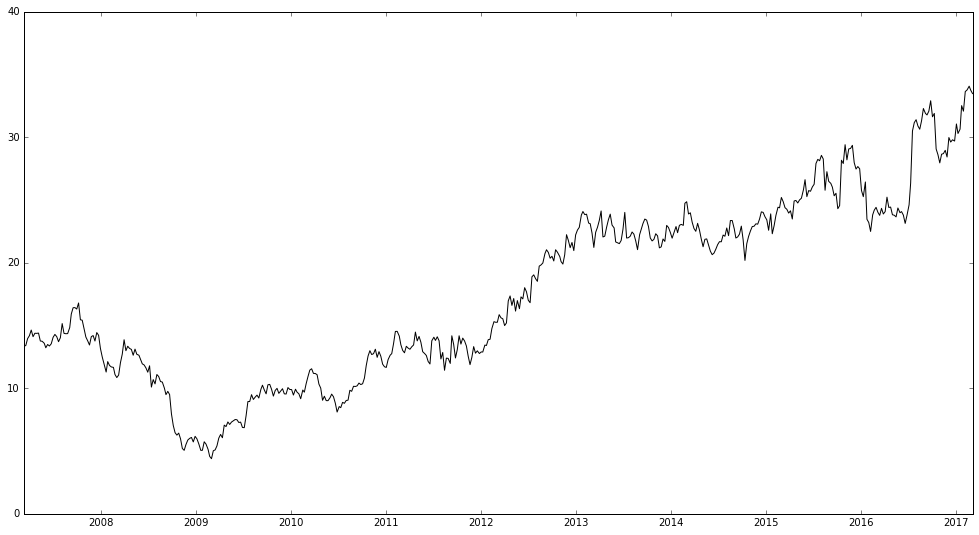

In [8]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Set the range and values of Y
ax1.set_yticks([0,10,20,30,40])

plt.show()

## Fills and Labels

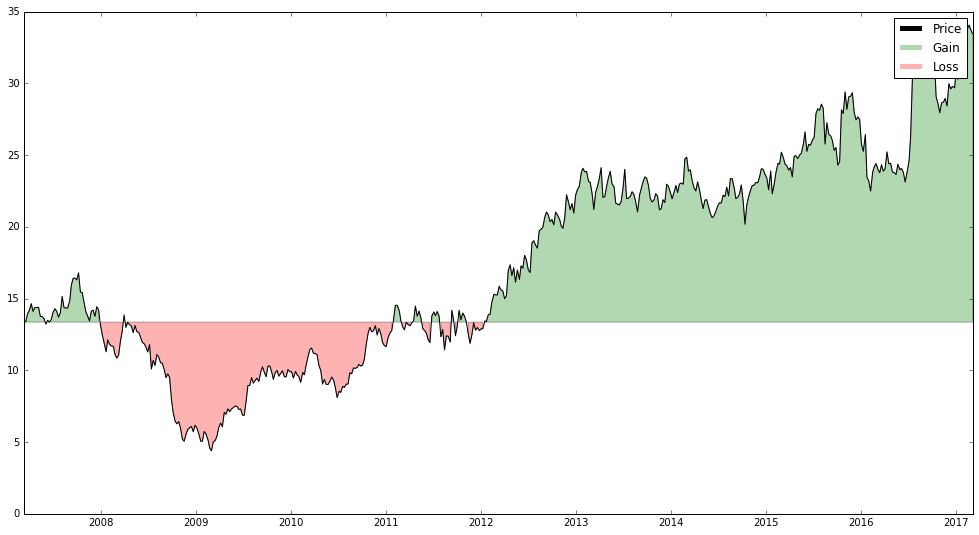

In [9]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Labels
plt.plot([],[], label="Price", linewidth=5, color='k')
plt.plot([],[], label="Gain", linewidth=5, color='g',alpha=.3)
plt.plot([],[], label="Loss", linewidth=5, color='r',alpha=.3)


# Green Fill
ax1.fill_between(date,closep,closep[0],
                 where=(closep > closep[0]), 
                 facecolor='g',alpha=.3)

# Red Fill
ax1.fill_between(date,closep,closep[0],
                 where=(closep < closep[0]), 
                 facecolor='r',alpha=.3)
plt.legend()
plt.show()

## Spines

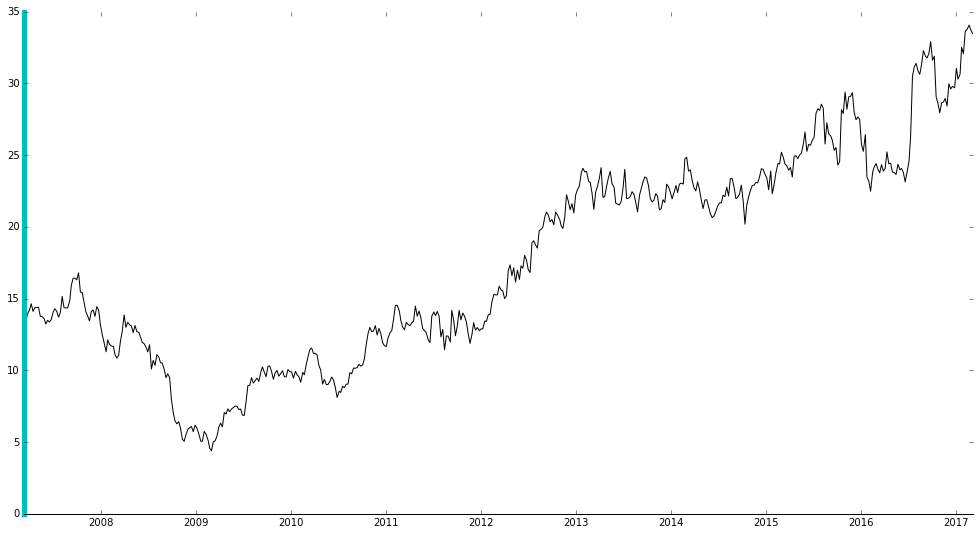

In [10]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Spines
ax1.spines['left'].set_color('c')
ax1.spines['left'].set_linewidth(5)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

## Horizontal Lines

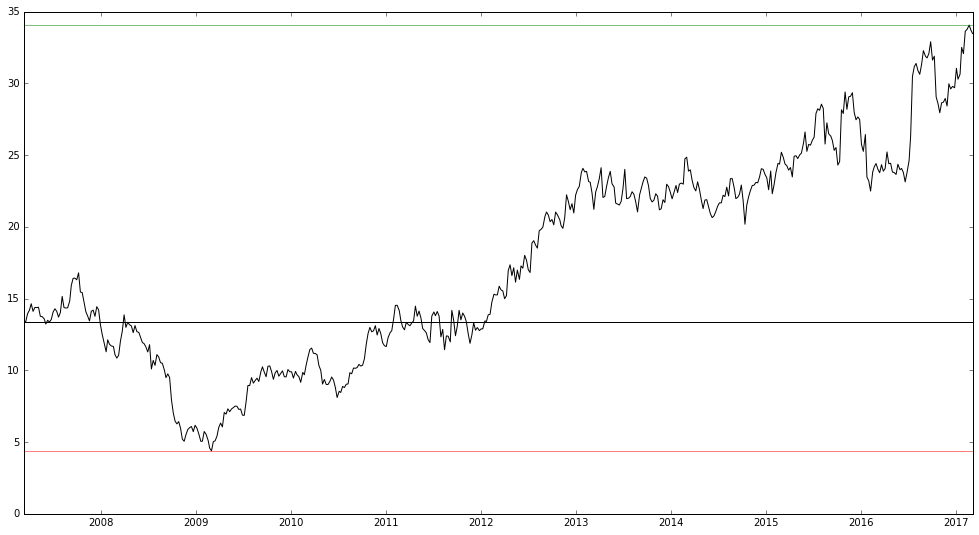

In [11]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Horizontal Lines
ax1.axhline(closep[0],color='k',linewidth=1)
bottom = min(closep)
top = max(closep)
ax1.axhline(bottom,color='r',linewidth=.5)
ax1.axhline(top,color='g',linewidth=.5)

plt.show()

## All Together

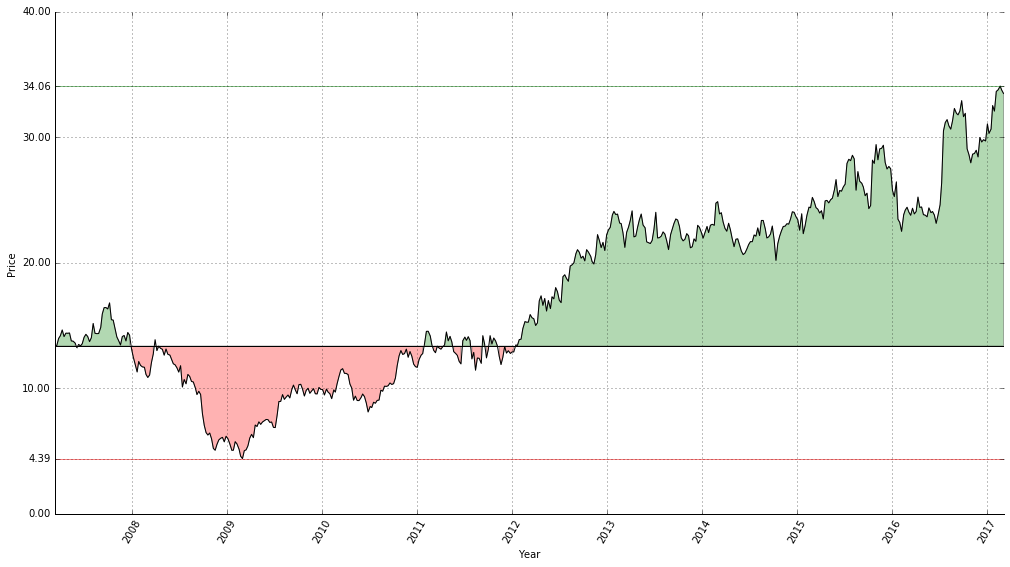

In [12]:
fig = plt.figure(figsize=(17,9))

# Plotting
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot_date(date, closep,"-", color='k')

# Rotate the labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)

# Draw a Grid
ax1.grid(True)    
    
 
    
# Fill Labels
plt.plot([],[], label="Price", linewidth=5, color='k')
plt.plot([],[], label="Gain", linewidth=5, color='g',alpha=.3)
plt.plot([],[], label="Loss", linewidth=5, color='r',alpha=.3)


# Green Fill
ax1.fill_between(date,closep,closep[0],
                 where=(closep > closep[0]), 
                 facecolor='g',alpha=.3)

# Red Fill
ax1.fill_between(date,closep,closep[0],
                 where=(closep < closep[0]), 
                 facecolor='r',alpha=.3)
    
# Spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
    
# Horizontal Lines
ax1.axhline(closep[0],color='k',linewidth=1)
bottom = min(closep)
top = max(closep)
ax1.axhline(bottom,color='r',linewidth=.5)
ax1.axhline(top,color='g',linewidth=.5)

# Set the range and values of Y
values = [i for i in range(0,50,10)]
values.append(top)
values.append(bottom)
ax1.set_yticks(values)   


#Labels
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

### Previous Part: [Loading Data from Internet](Matplotlib Tutorial Part 08 - Loading Data from Internet.ipynb)

### Next Part: [Handling Unix Time](Matplotlib Tutorial Part 10 - Handling Unix Time.ipynb)

### [Table of Contents](Table of Contents.ipynb) 